## COSC 3337 - Lab 3 - Ujwal Joshi

### In this lab, we will practice for Naive Bayes, Cross Validation, KNN, Entropy and Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sb
from statistics import mean 

We will use the dataset "Naive-Bayes-Classification-Data.csv" to practice Naive Bayes classifier in python. There are 3 columns in the dataset, glucose, blood pressure and whether have diabetes. You will use glucose and blood pressure to predict diabetes. 

In [2]:
Diabetes = pd.read_csv(filepath_or_buffer='Naive-Bayes-Classification-Data.csv')
Diabetes.head(10)

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0
7,30,63,1
8,65,65,1
9,45,82,0


1. Seperate the original dataset to training set(70%) and testing set(30%), and train the Naive Bayes model with training data and test with the testing data, print out the accuracy rate. (10)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

x = Diabetes.drop(['diabetes'], axis=1)
y = Diabetes.diabetes.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9464882943143813


2. Instead of seperate training set and testing set, use K-fold cross validation to get the accuracy rate. Print all 10 accuracy score. (k = 10) (10)

In [4]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(10)
print("Average Accuracy:", mean(cross_val_score(model, x, y, cv=k_fold)))

Average Accuracy: 0.9335252525252525


3. Explain whether we need to use Cross Validation to test the model.(10)

Despite the higher accuracy of the Naive Bayes model we still need to utilize cross validation to test the model's performance on unseen data and potentially mitigate any overfitting.

4. Use the same dataset. Train a KNN model with the data.(k = 10). Print the ACC score with K-fold cross validation, k = 10.(10)

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
k_fold = KFold(10)
print("Average Accuracy:", mean(cross_val_score(knn, x, y, cv=k_fold)))

Average Accuracy: 0.9275252525252525


5. Next, plot misclassification error vs neighbors, and find the best k and print it's acc score.(10) 

The optimal number of neighbors 3 Its ACC score is: 0.9345656565656565


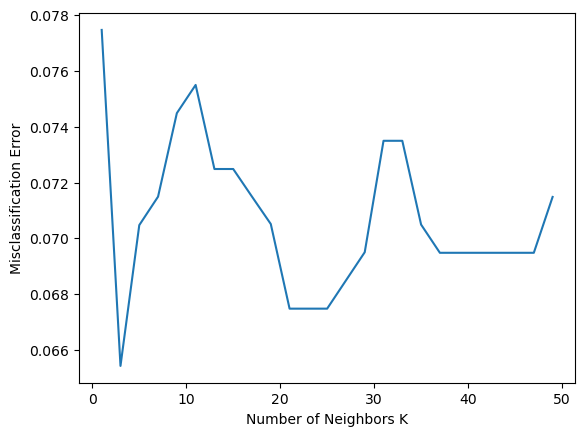

In [9]:
neighbors = list(range(1, 50, 2)) # where did this come from???
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

mse = [1 - x for x in cv_scores]
optimal_k = neighbors[mse.index(min(mse))]

print(f"The optimal number of neighbors {optimal_k} Its ACC score is: {cv_scores[mse.index(min(mse))]}")

plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

6. Apply decision tree to the data, choose entropy as the criterion, max_depth = 2 (Use training set and testing set.) and print the ACC score.  (10)

In [10]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion="entropy", max_depth=2)
DTC.fit(x_train, y_train)
y_pred = DTC.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9096989966555183


7. Print the tree.(10)

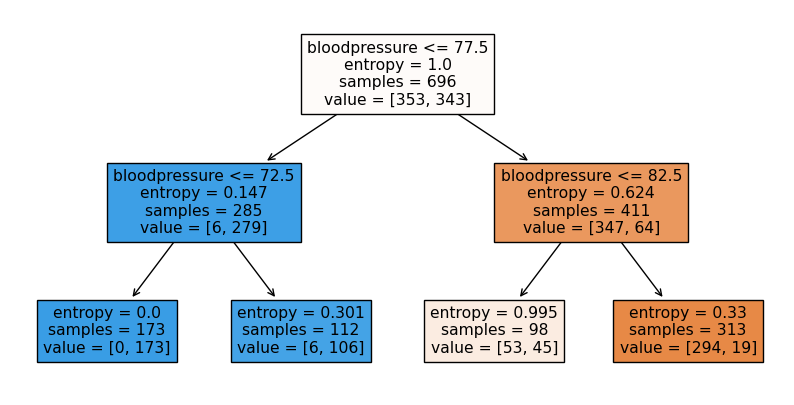

In [13]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(10, 5))
_ = plot_tree(DTC, feature_names=list(x.columns), filled=True)

8. Calculate the root's entropy and check whether your result is the same as the tree plot(use the equation from class only use numpy to do the calculation).(10)

In [14]:
from scipy.stats import entropy

base = 2 # work in units of bits
pk = np.array([353/(353+343), 343/(353+343)])
H = entropy(pk, base=base)
H

0.999851084121715

9. Calculate given blood pressure <= 79, what is the entropy for pressure <= 79, what is the IG, (use the equation from class only use numpy to do the calculation). (10)

In [15]:
base = 2 # work in units of bits
pk = np.array([6/(285), 279/(285)])
H_2 = entropy(pk, base=base)
print("Entropy = ", H_2)
print("IG = ", H-H_2)

Entropy =  0.1473106669304539
IG =  0.8525404171912611


10. Find the best max_depth in Decision Tree for entopy and Gini. If it's different, explain why.(10)

In [18]:
ACCs_Gini = []

for max_depth in range(1,11):
    DTC_gini = DecisionTreeClassifier(max_depth = max_depth)
    DTC_gini.fit(x_train,y_train)
    y_pred= DTC_gini.predict(x_test)
    ACCs_Gini.append(metrics.accuracy_score(y_test, y_pred))

print("Accuracies:", ACCs_Gini)

Accuracies: [0.939799331103679, 0.9431438127090301, 0.9230769230769231, 0.9096989966555183, 0.9297658862876255, 0.939799331103679, 0.939799331103679, 0.939799331103679, 0.939799331103679, 0.939799331103679]


The best depth for the decision tree is still 2 for the gini index as that dpeth still has the highest accuracy.